In [ ]:
import yaml
import numpy as np
import zstandard as zstd
import os
from OptimumFilter import *
from TraceSimulator import LongTraceSimulator
import matplotlib.pyplot as plt
def read_yaml_to_dict(file_path):
    with open(file_path, 'r') as file:
        config_dict = yaml.safe_load(file)
    return config_dict
sampling_frequency = 3906250
vac_template = np.load("templates/vac_ch_template.npy")
sub_template = np.load("templates/sub_ch_template.npy")
noise_psd = np.load("../../templates/noise_psd_from_MMC.npy")
config = read_yaml_to_dict('/home/dwong/DELight_mtr/trigger_study/wk11/config.yaml')
lts = LongTraceSimulator(config)
vac_of = OptimumFilter(vac_template, noise_psd, sampling_frequency)
sub_of = OptimumFilter(sub_template, noise_psd, sampling_frequency)

In [62]:
trace, idx= lts.generate(
            E=7000,
            x=-94, y=0, z=-1800,
            no_noise=False,
            type_recoil='ER',
            quantize=True,
            phonon_only=False
        )
trace = trace[0]

In [66]:
amps = []
chisqs = []
shifts = []
positions = []
significant_fits = []
channels = []

# Store all fit results for later analysis
all_fit_results = []

for ch in range(54):
    if ch < 45:
        ampl, chisq, shift, position = sub_of.rolling_fit_with_shift(trace[ch])
    else:
        ampl, chisq, shift, position = vac_of.rolling_fit_with_shift(trace[ch])
    
    # Store raw arrays
    amps.append(ampl)
    chisqs.append(chisq)
    shifts.append(shift)
    positions.append(position)
    
    # Store per-channel fits for later analysis
    fit_results = [
        {'channel': ch, 'amplitude': a, 'shift': s, 'chisq': c, 'position': p}
        for a, s, c, p in zip(ampl, shift, chisq, position)
    ]
    all_fit_results.extend(fit_results)

    # Filter significant amplitudes
    for res in fit_results:
        if res['amplitude'] > 7.5:
            significant_fits.append(res)
            channels.append(ch)


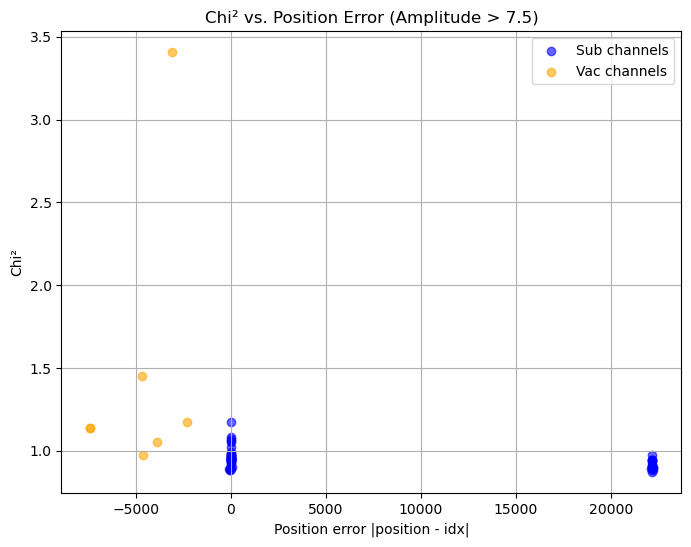

In [86]:
trace, idx= lts.generate(
            E=7000,
            x=-94, y=0, z=-1800,
            no_noise=False,
            type_recoil='ER',
            quantize=True,
            phonon_only=False
        )
trace = trace[0]
amps = []
chisqs = []
shifts = []
positions = []
significant_fits = []
channels = []
all_fit_results = []

# These are for plotting
sub_deltas = []
sub_chisqs = []
vac_deltas = []
vac_chisqs = []

for ch in range(54):
    if ch < 45:
        ampl, chisq, shift, position = sub_of.rolling_fit_with_shift(trace[ch])
    else:
        ampl, chisq, shift, position = vac_of.rolling_fit_with_shift(trace[ch])
    
    # Store raw arrays
    amps.append(ampl)
    chisqs.append(chisq)
    shifts.append(shift)
    positions.append(position)
    
    # Store per-channel fits for later analysis
    fit_results = [
        {'channel': ch, 'amplitude': a, 'shift': s, 'chisq': c, 'position': p}
        for a, s, c, p in zip(ampl, shift, chisq, position)
    ]
    all_fit_results.extend(fit_results)

    # Filter significant amplitudes
    for res in fit_results:
        if res['amplitude'] > 7.5:
            significant_fits.append(res)
            channels.append(ch)
            delta = (res['position'] - idx) 
            if ch < 45:
                sub_deltas.append(delta)
                sub_chisqs.append(res['chisq'])
            else:
                vac_deltas.append(delta)
                vac_chisqs.append(res['chisq'])

# ---- Plot ----
plt.figure(figsize=(8, 6))
plt.scatter(sub_deltas, sub_chisqs, alpha=0.6, label='Sub channels', color='blue')
plt.scatter(vac_deltas, vac_chisqs, alpha=0.6, label='Vac channels', color='orange')
plt.xlabel("Position error |position - idx|")
plt.ylabel("Chi²")
plt.title("Chi² vs. Position Error (Amplitude > 7.5)")
plt.grid(True)
plt.legend()
plt.show()


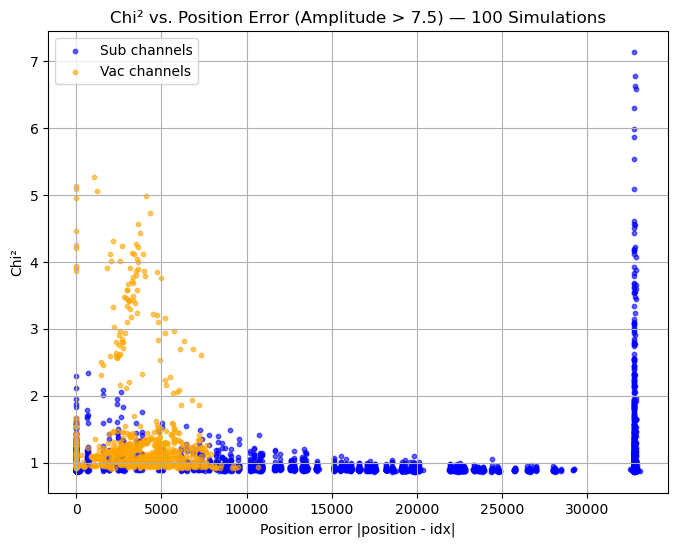

In [75]:
import matplotlib.pyplot as plt

# These are for plotting
sub_deltas = []
sub_chisqs = []
vac_deltas = []
vac_chisqs = []

for _ in range(100):
    trace_batch, idx = lts.generate(
        E=7000,
        x=-94, y=0, z=-1800,
        no_noise=False,
        type_recoil='ER',
        quantize=True,
        phonon_only=False
    )
    trace = trace_batch[0]  # take first trace from batch

    for ch in range(54):
        if ch < 45:
            ampl, chisq, shift, position = sub_of.rolling_fit_with_shift(trace[ch])
        else:
            ampl, chisq, shift, position = vac_of.rolling_fit_with_shift(trace[ch])
        
        # Store per-channel fits for later analysis
        fit_results = [
            {'channel': ch, 'amplitude': a, 'shift': s, 'chisq': c, 'position': p}
            for a, s, c, p in zip(ampl, shift, chisq, position)
        ]

        for res in fit_results:
            if res['amplitude'] > 7.5:
                delta = abs(res['position'] - idx)  # use per-trace idx
                if ch < 45:
                    sub_deltas.append(delta)
                    sub_chisqs.append(res['chisq'])
                else:
                    vac_deltas.append(delta)
                    vac_chisqs.append(res['chisq'])

# ---- Plot ----
plt.figure(figsize=(8, 6))
plt.scatter(sub_deltas, sub_chisqs, alpha=0.6, label='Sub channels', color='blue', s=10)
plt.scatter(vac_deltas, vac_chisqs, alpha=0.6, label='Vac channels', color='orange', s=10)
plt.xlabel("Position error |position - idx|")
plt.ylabel("Chi²")
plt.title("Chi² vs. Position Error (Amplitude > 7.5) — 100 Simulations")
plt.grid(True)
plt.legend()
plt.show()


In [69]:
idx

2096352

In [29]:
chisqs[87]

0.9519757419055438